K Nearest Neighbor IRIS Dataset Project

Data Set : https://archive.ics.uci.edu/ml/datasets/iris

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
data = pd.read_csv('C:/Users/shilp/OneDrive/Documents/Data/IrisDataset/iris.data')

In [6]:
data.head()

,sepalLen,sepalWd,petalLen,petalWd,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


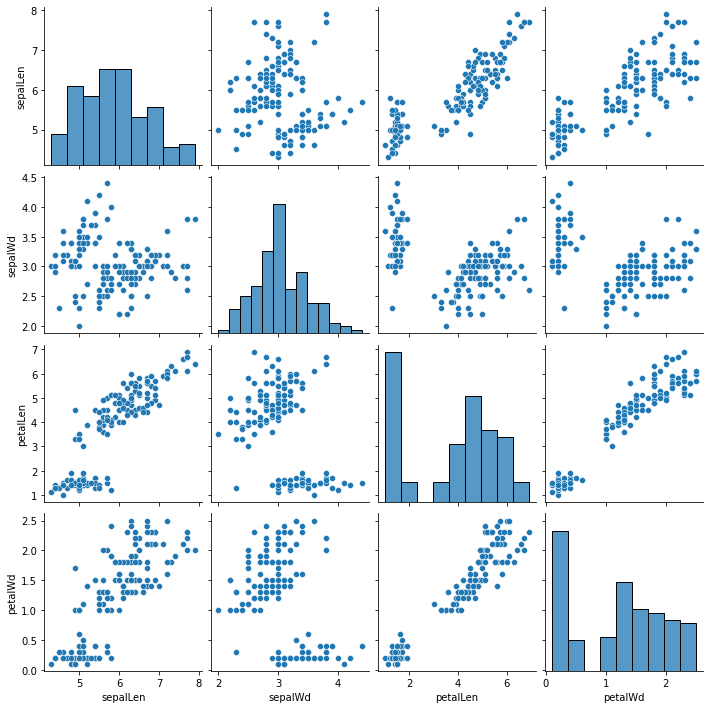

In [7]:
sb.pairplot(data)

In [10]:
print(data.shape)
print(data.describe)

(150, 5)
<bound method NDFrame.describe of      sepalLen  sepalWd  petalLen  petalWd           Class
0         5.1      3.5       1.4      0.2     Iris-setosa
1         4.9      3.0       1.4      0.2     Iris-setosa
2         4.7      3.2       1.3      0.2     Iris-setosa
3         4.6      3.1       1.5      0.2     Iris-setosa
4         5.0      3.6       1.4      0.2     Iris-setosa
..        ...      ...       ...      ...             ...
145       6.7      3.0       5.2      2.3  Iris-virginica
146       6.3      2.5       5.0      1.9  Iris-virginica
147       6.5      3.0       5.2      2.0  Iris-virginica
148       6.2      3.4       5.4      2.3  Iris-virginica
149       5.9      3.0       5.1      1.8  Iris-virginica

[150 rows x 5 columns]>


In [13]:
scaler = StandardScaler()

In [17]:
scaler.fit(data.drop(['Class'],axis=1))

StandardScaler()

In [19]:
scaled_features = scaler.transform(data.drop(['Class'],axis=1))

In [20]:
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [26]:
dfFeature = pd.DataFrame(scaled_features,columns= data.columns[:-1])
dfFeature

,sepalLen,sepalWd,petalLen,petalWd
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [28]:
X = dfFeature
y = data['Class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [34]:
print(y_test)

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

In [40]:
k_range = list(range(1,40))
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

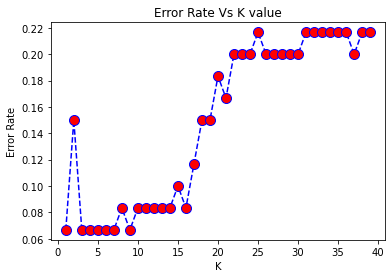

In [43]:
plt.plot(k_range, error_rate, color ='blue', linestyle = 'dashed', marker = 'o',markerfacecolor ='red',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [49]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

